In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
df = pd.read_csv("health_train.csv").copy()
df.head()

,age,sex,bmi,smoker,region,children,charges
0,21.000,male,25.745,no,northeast,2,3279.869
1,36.977,female,25.744,yes,southeast,3,21454.494
2,18.000,male,30.030,no,southeast,1,1720.354
3,37.000,male,30.677,no,northeast,3,6801.438
4,58.000,male,32.010,no,southeast,1,11946.626


In [ ]:
outliers = []
def detect_outliers_iqr(df):
    for i in df.columns:
        q1, q3 = df[i].quantile([0.25, 0.75])
       
        IQR = q3-q1
        lwr_bound = q1-(1.5*IQR)
        upr_bound = q3+(1.5*IQR)
        for j in df[i]: 
            if (j<lwr_bound or j>upr_bound):
                for z in list(df[i][df[i] == j].index):
                    outliers.append(z)
    
    return df.iloc[outliers]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

In [11]:
def firstmurat(df):
    print("-------------------------------------")
    print("df.shape : \n", df.shape)
    print("-------------------------------------")
    print(df.info())
    print("-------------------------------------")
    print(df.describe().T)
    print("-------------------------------------")
    print(df.isnull().sum())
    print("-------------------------------------")
    print(df.duplicated().value_counts())
    print("-------------------------------------")
    for i in df.columns:
        print(df[i].value_counts())
    
    for i,col in enumerate(df.columns):
        plt.figure(i)
        sns.histplot(df[col])

-------------------------------------
df.shape : 
 (2500, 7)
-------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2500 non-null   float64
 1   sex       2500 non-null   object 
 2   bmi       2500 non-null   float64
 3   smoker    2500 non-null   object 
 4   region    2500 non-null   object 
 5   children  2500 non-null   int64  
 6   charges   2500 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 136.8+ KB
None
-------------------------------------
            count      mean       std      min      25%      50%       75%  \
age      2500.000    39.003    12.265   18.000   28.846   39.350    48.689   
bmi      2500.000    30.575     5.390   15.960   26.718   30.200    34.046   
children 2500.000     2.488     1.707    0.000    1.000    2.000     4.000   
charges  2500.000 12679.3

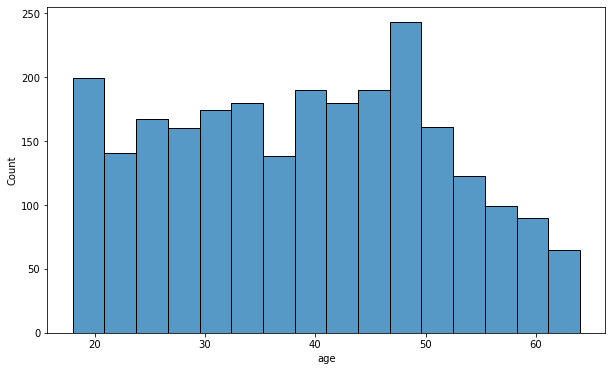

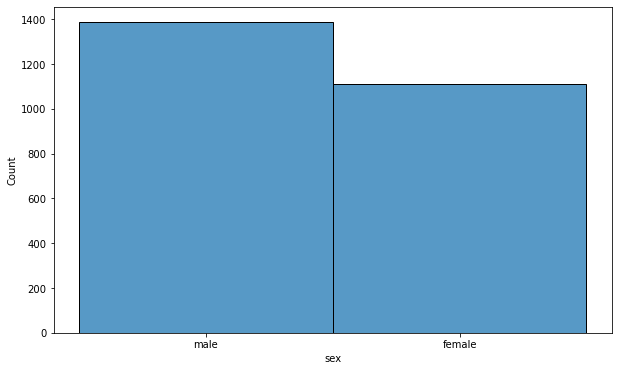

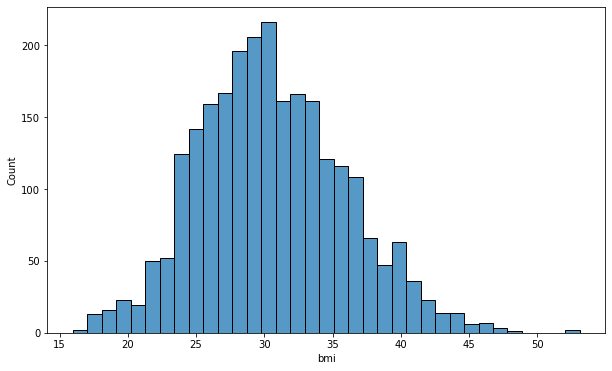

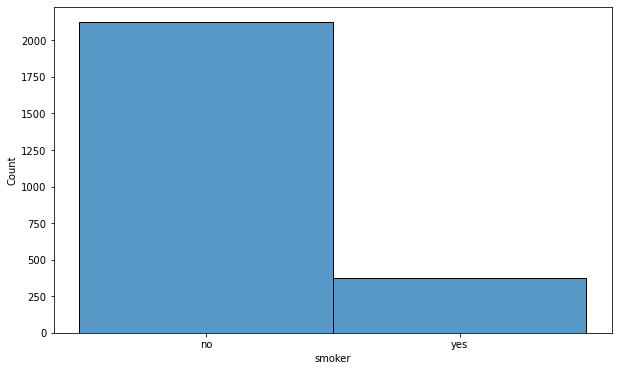

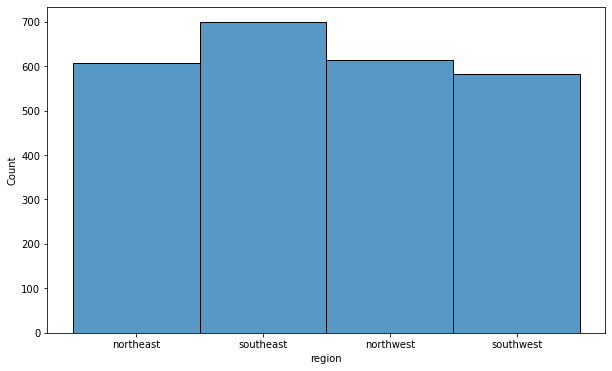

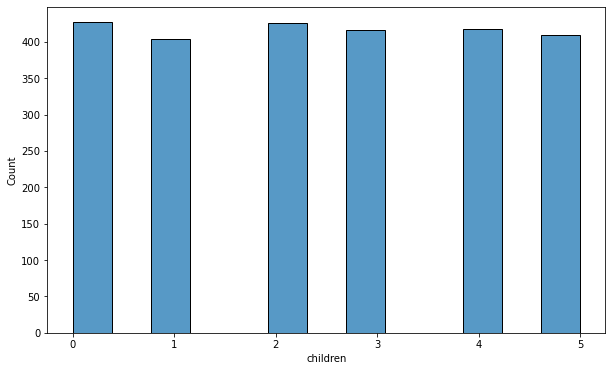

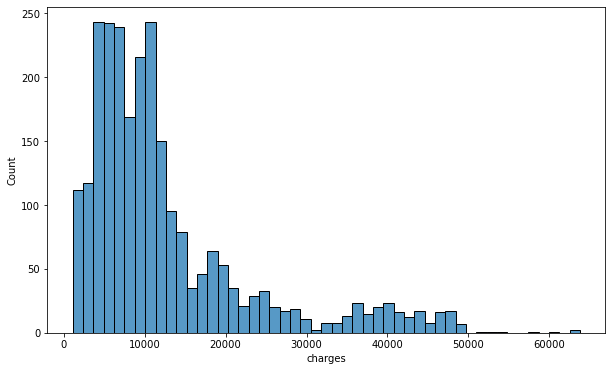

In [12]:
firstmurat(df)